In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset
  # Update with your file path
data = pd.read_csv(r'C:\Users\bandi\OneDrive\Documents\Desktop\ML LEARNING\bird_migration.csv')

# Data Preprocessing
data_cleaned = data.drop(columns=['Unnamed: 0', 'device_info_serial', 'date_time'])
imputer = SimpleImputer(strategy='mean')
data_cleaned[['direction', 'speed_2d']] = imputer.fit_transform(data_cleaned[['direction', 'speed_2d']])

label_encoder = LabelEncoder()
data_cleaned['bird_name'] = label_encoder.fit_transform(data_cleaned['bird_name'])

# Split features and target variable
X = data_cleaned.drop(columns='altitude')  # Features (predicting altitude)
y = data_cleaned['altitude']  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and models that benefit from scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    "Linear Regression": LinearRegression(),
    "SVR": SVR()
}

# Dictionary to store results
results = {}

# Training and evaluating each model
for model_name, model in models.items():
    if model_name == "SVR":  # Use scaled data for SVR
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics and parameters
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2,
        "Parameters": model.get_params()  # Extract model parameters
    }
    
    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Parameters: {model.get_params()}\n")
    
# Convert results dictionary to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("Summary of Results:\n", results_df)


Model: Random Forest
Mean Absolute Error (MAE): 38.95191537467701
Mean Squared Error (MSE): 9746.379728036174
Root Mean Squared Error (RMSE): 98.72375462894517
R^2 Score: 0.4337564603942312
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Model: Gradient Boosting
Mean Absolute Error (MAE): 40.32398233992958
Mean Squared Error (MSE): 11385.792817801454
Root Mean Squared Error (RMSE): 106.70423055250177
R^2 Score: 0.3385101128551159
Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0,

In [ ]:
!pip install xgboost


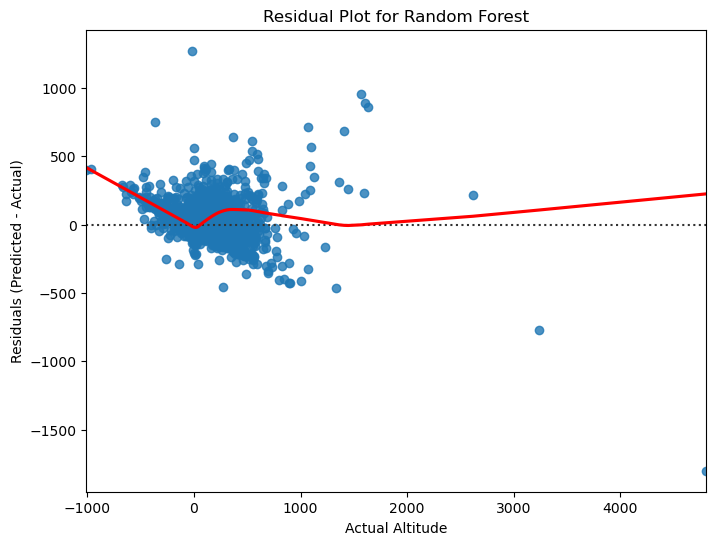

C:\Users\bandi\AppData\Local\Temp\ipykernel_18732\1738283201.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


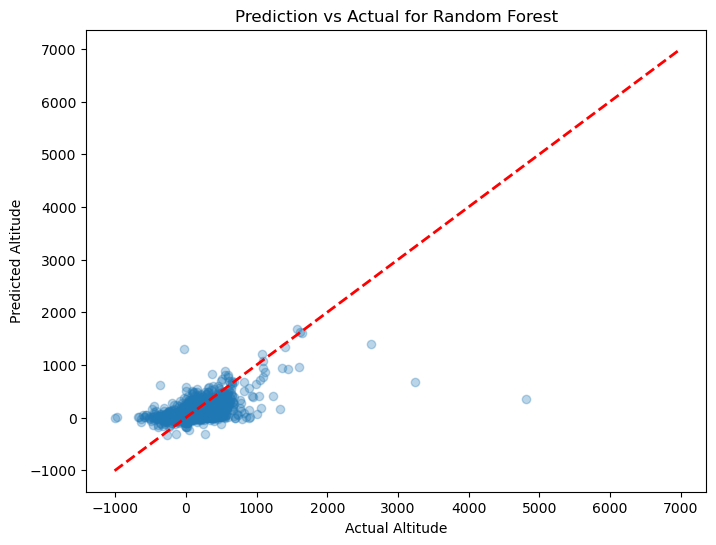

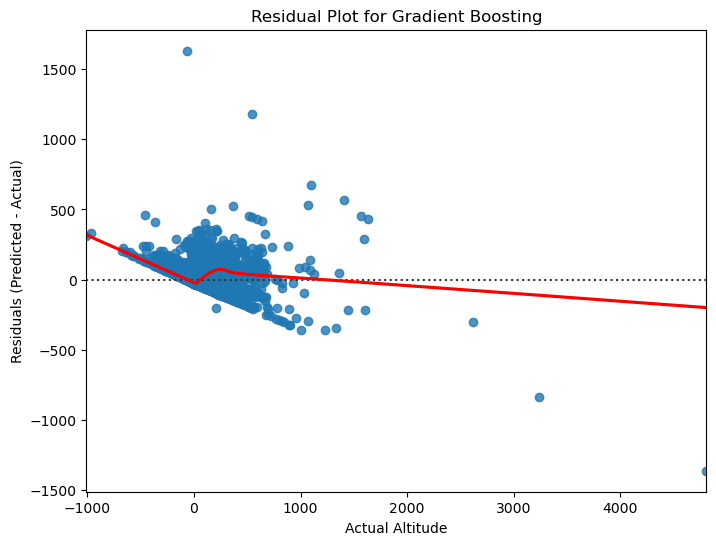

C:\Users\bandi\AppData\Local\Temp\ipykernel_18732\1738283201.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


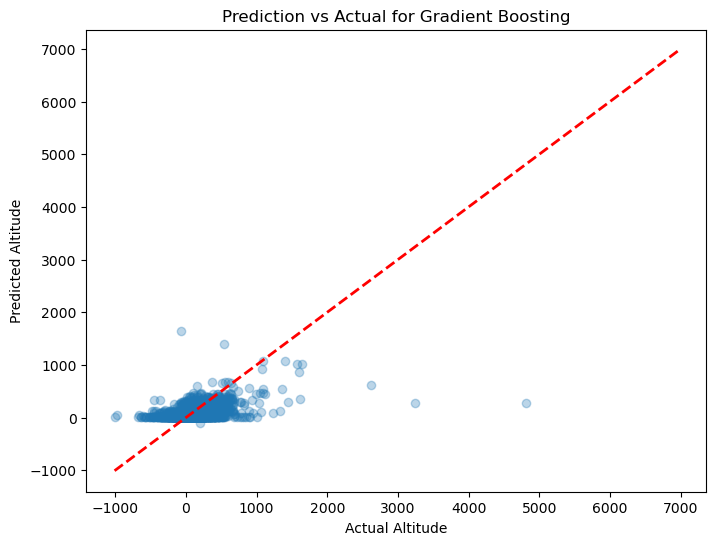

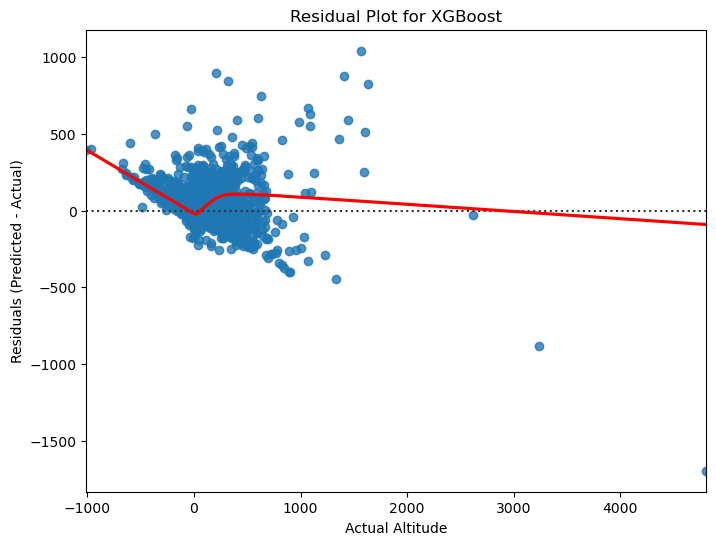

C:\Users\bandi\AppData\Local\Temp\ipykernel_18732\1738283201.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


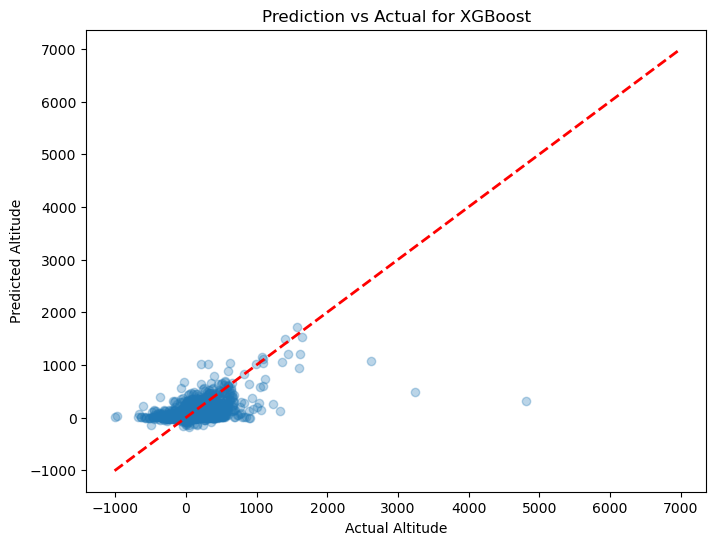

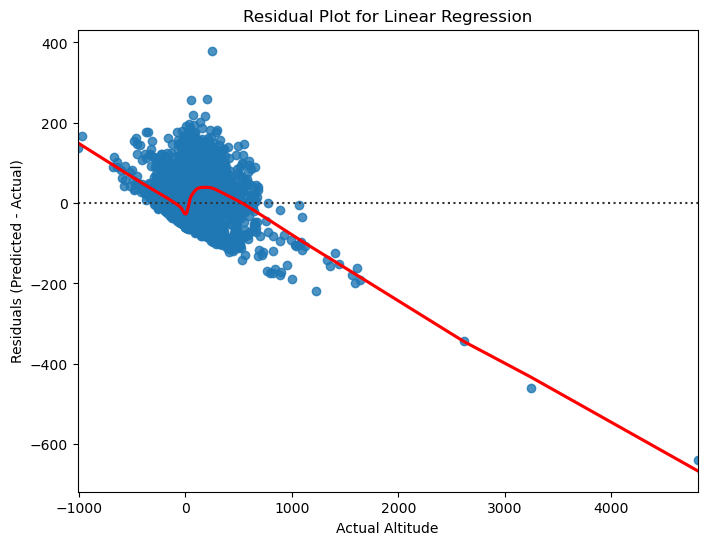

C:\Users\bandi\AppData\Local\Temp\ipykernel_18732\1738283201.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


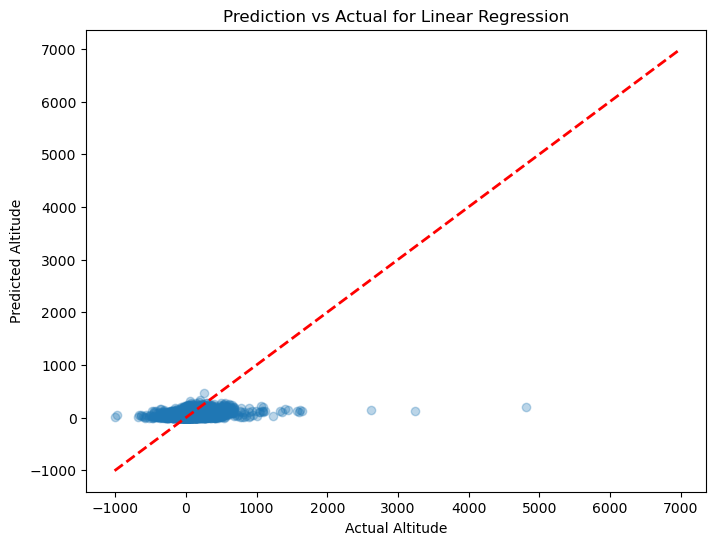

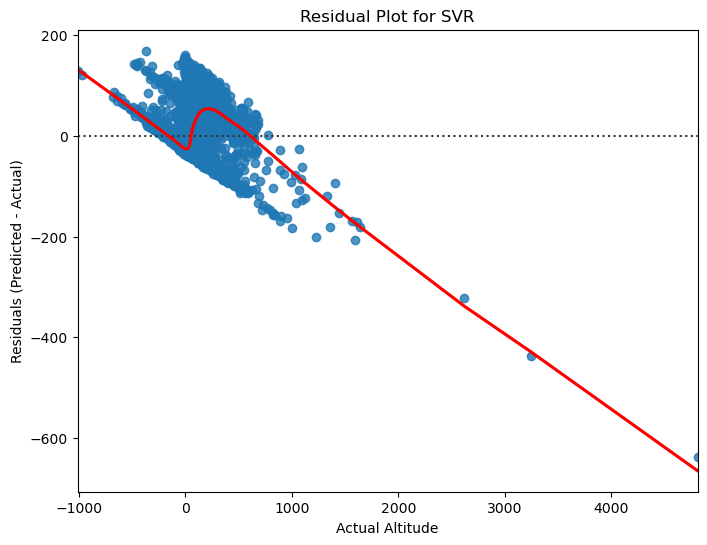

C:\Users\bandi\AppData\Local\Temp\ipykernel_18732\1738283201.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


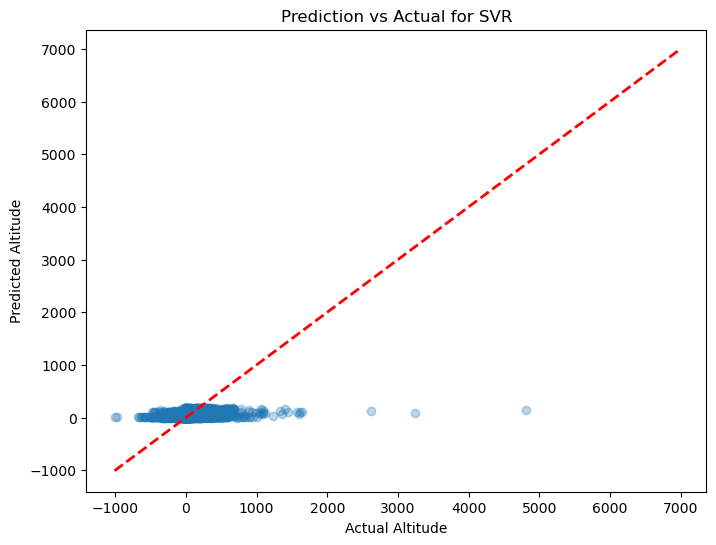

                         MAE           MSE        RMSE       R^2
Random Forest      38.951915   9746.379728   98.723755  0.433756
Gradient Boosting  40.323982  11385.792818  106.704231  0.338510
XGBoost            40.001587  10372.486191  101.845403  0.397381
Linear Regression  54.687018  14271.174493  119.462021  0.170876
SVR                48.652178  14324.343386  119.684349  0.167787


C:\Users\bandi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


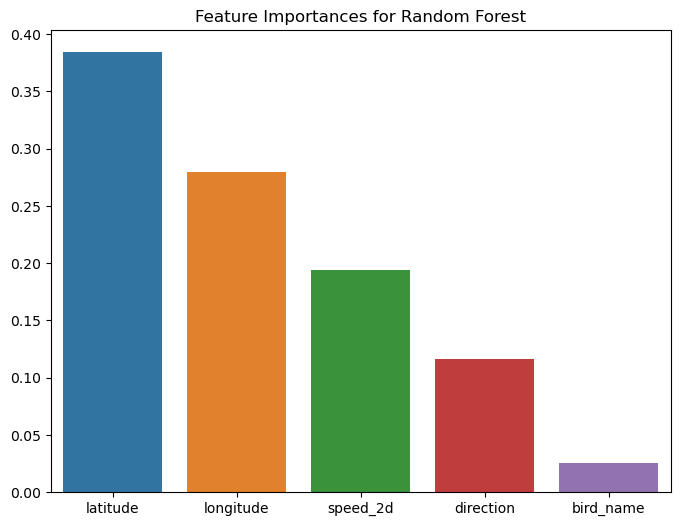

C:\Users\bandi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


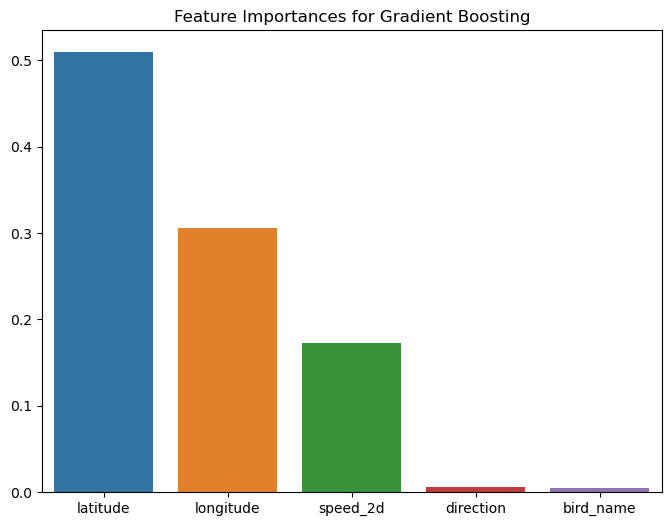

C:\Users\bandi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


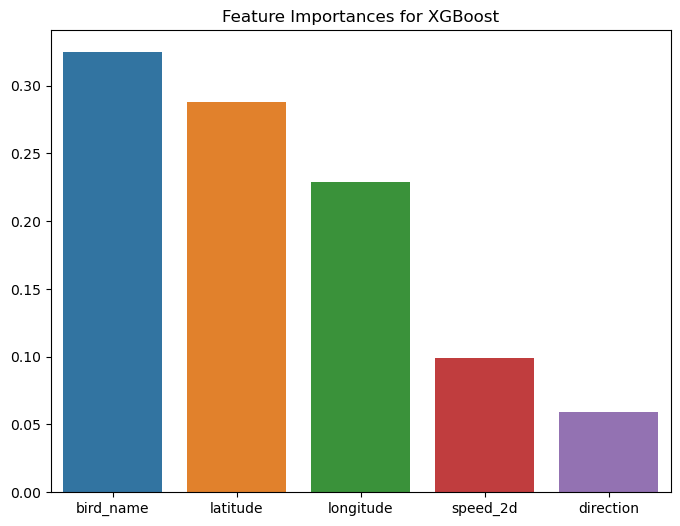

C:\Users\bandi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bandi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bandi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bandi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

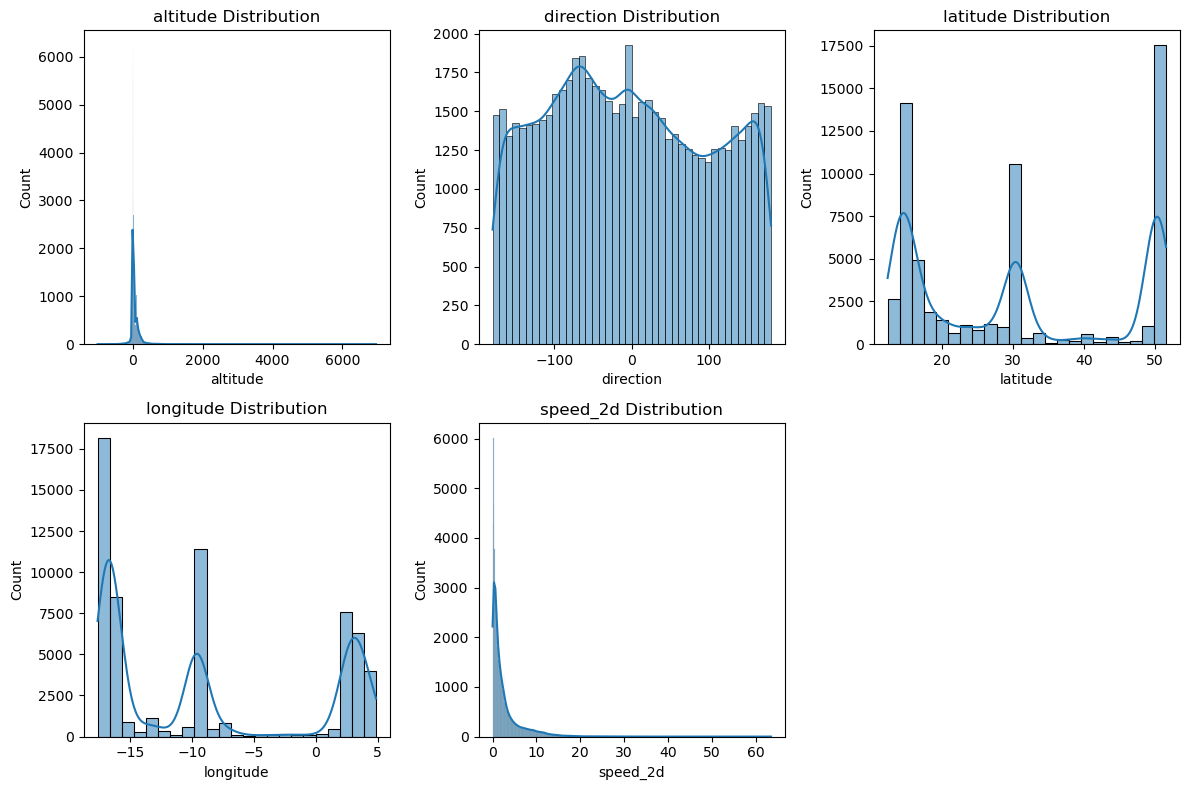

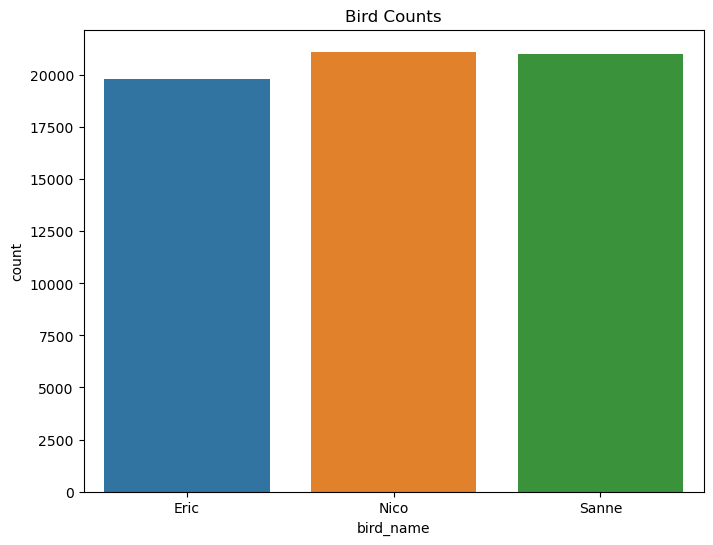

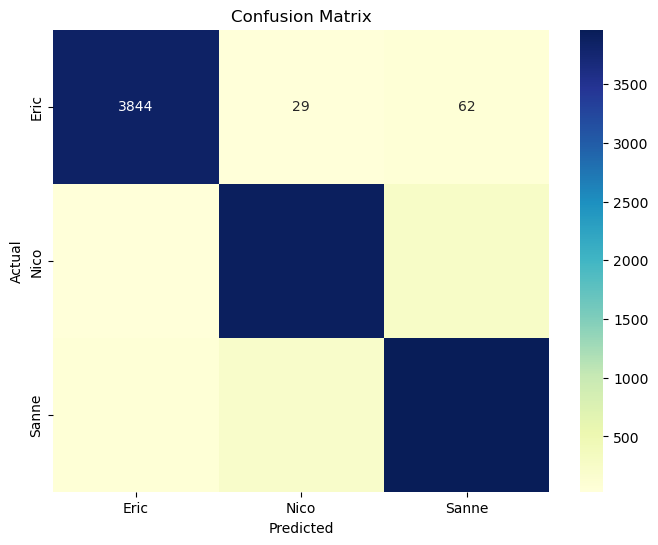

C:\Users\bandi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


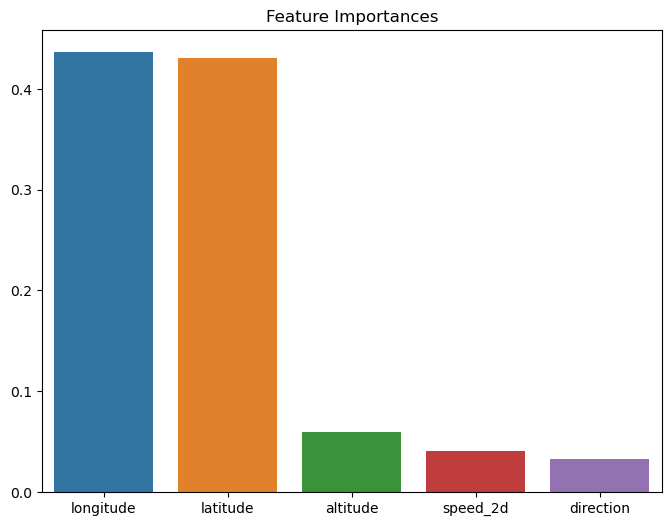

Accuracy: 0.9467054263565892
Classification Report:
               precision    recall  f1-score   support

        Eric       0.97      0.98      0.97      3935
        Nico       0.94      0.93      0.94      4200
       Sanne       0.93      0.93      0.93      4249

    accuracy                           0.95     12384
   macro avg       0.95      0.95      0.95     12384
weighted avg       0.95      0.95      0.95     12384



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the dataset

data = pd.read_csv(r'C:\Users\bandi\OneDrive\Documents\Desktop\ML LEARNING\bird_migration.csv')

# Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0', 'device_info_serial', 'date_time'])

# Handle missing values by imputing with mean for numerical columns
imputer = SimpleImputer(strategy='mean')
data_cleaned[['direction', 'speed_2d']] = imputer.fit_transform(data_cleaned[['direction', 'speed_2d']])

# Encode the 'bird_name' categorical column
label_encoder = LabelEncoder()
data_cleaned['bird_name'] = label_encoder.fit_transform(data_cleaned['bird_name'])

# Split features and target variable
X = data_cleaned.drop(columns='bird_name')  # Features
y = data_cleaned['bird_name']  # Target

# Split into training and validation sets (80% train, 20% validate)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Visualization: Feature Distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

# Data Visualization: Bird Counts
plt.figure(figsize=(8, 6))
sns.countplot(x='bird_name', data=data_cleaned)
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.title('Bird Counts')
plt.show()

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Validation
y_pred = model.predict(X_val)

# Model Performance: Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Model Performance: Feature Importance
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(8, 6))
sns.barplot(x=[X.columns[i] for i in indices], y=feature_importances[indices])
plt.title("Feature Importances")
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


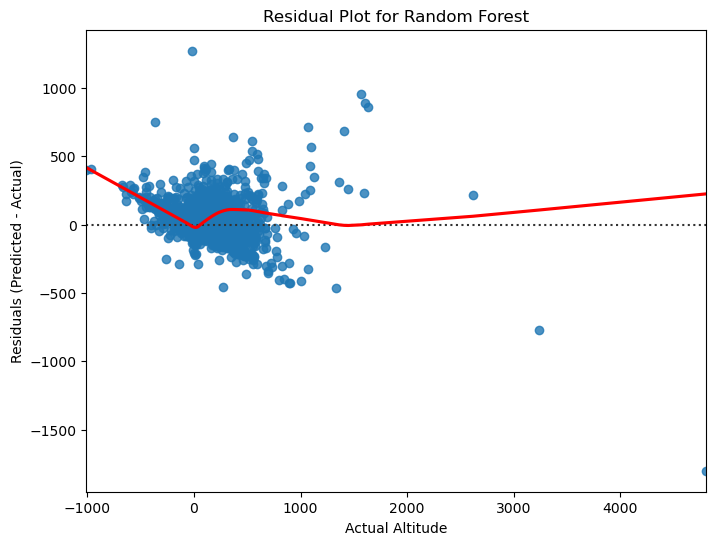

C:\Users\bandi\AppData\Local\Temp\ipykernel_16092\3830643335.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=2, color="red")


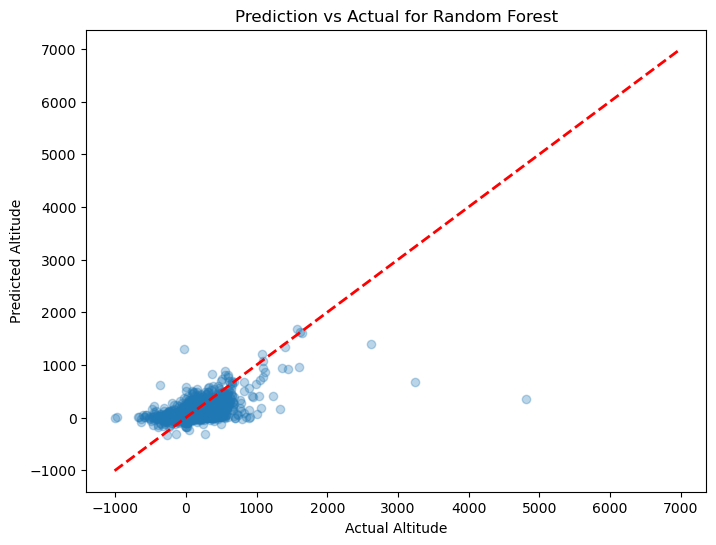

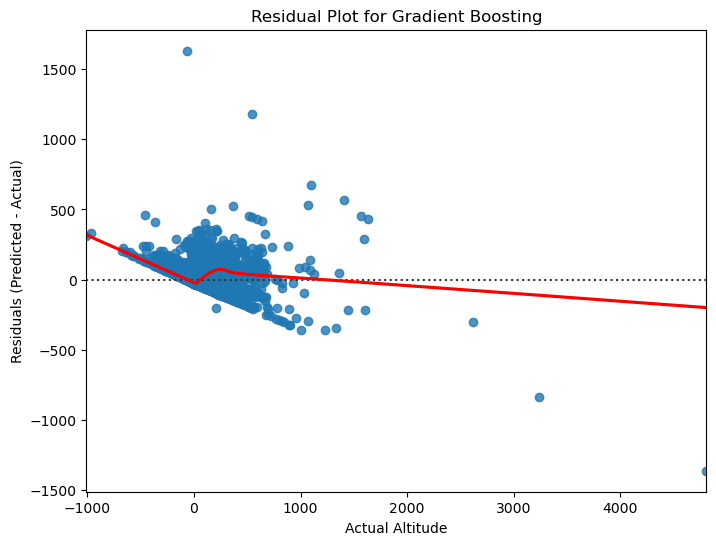

C:\Users\bandi\AppData\Local\Temp\ipykernel_16092\3830643335.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=2, color="red")


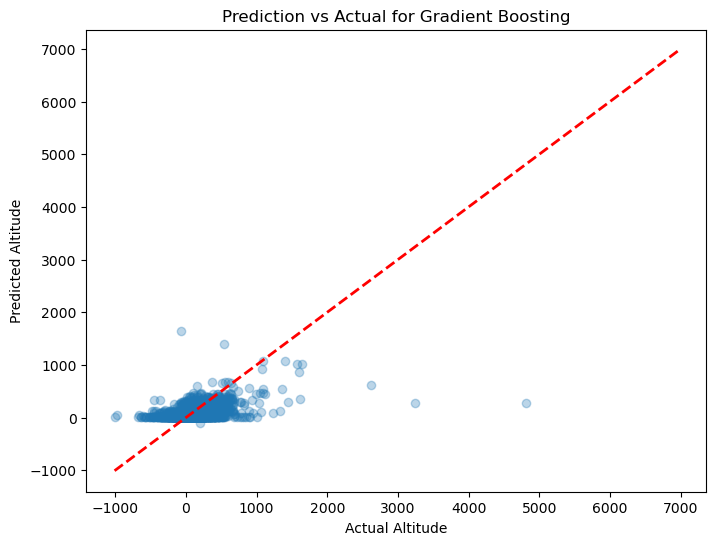

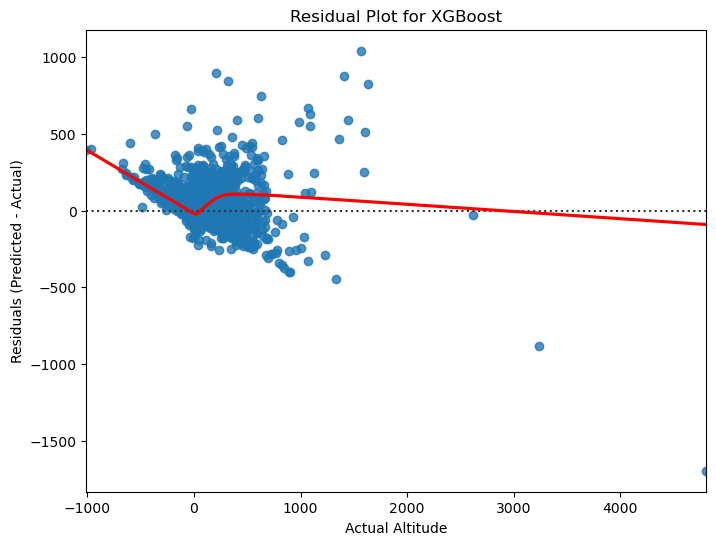

C:\Users\bandi\AppData\Local\Temp\ipykernel_16092\3830643335.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=2, color="red")


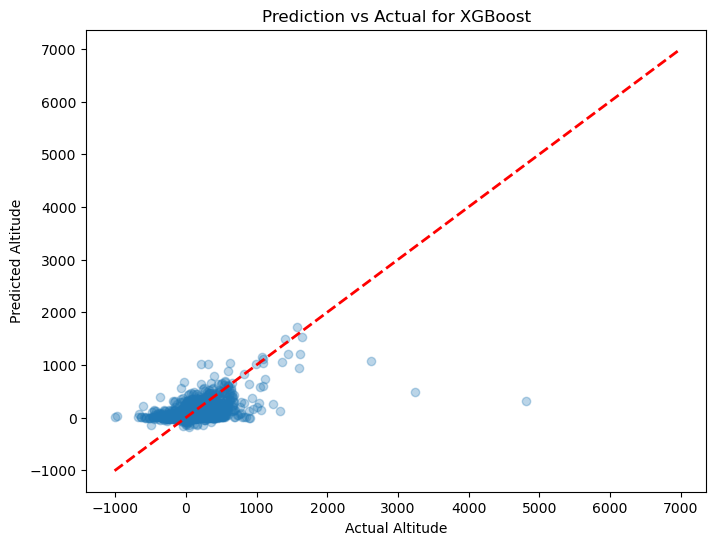

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Load the dataset
data = pd.read_csv(r'C:\Users\bandi\OneDrive\Documents\Desktop\ML LEARNING\bird_migration.csv')

# Data Preprocessing
data_cleaned = data.drop(columns=['Unnamed: 0', 'device_info_serial', 'date_time'])
imputer = SimpleImputer(strategy='mean')
data_cleaned[['direction', 'speed_2d']] = imputer.fit_transform(data_cleaned[['direction', 'speed_2d']])

# Encoding the categorical variable
label_encoder = LabelEncoder()
data_cleaned['bird_name'] = label_encoder.fit_transform(data_cleaned['bird_name'])

# Split data into features and target variable for both tasks
X_reg = data_cleaned.drop(columns='altitude')  # Regression task features
y_reg = data_cleaned['altitude']  # Regression target

X_class = data_cleaned.drop(columns='bird_name')  # Classification task features
y_class = data_cleaned['bird_name']  # Classification target

# Train-test split for regression (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train-validation split for classification (80% train, 20% validate)
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Standardize features for regression models that benefit from scaling
scaler = StandardScaler()
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

# Initialize regression models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    "Linear Regression": LinearRegression(),
    "SVR": SVR()
}

# Train, predict, and evaluate each regression model
results = {}
for model_name, model in models.items():
    if model_name == "SVR":  # Use scaled data for SVR
        model.fit(X_train_scaled_reg, y_train_reg)
        y_pred_reg = model.predict(X_test_scaled_reg)
    else:
        model.fit(X_train_reg, y_train_reg)
        y_pred_reg = model.predict(X_test_reg)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, y_pred_reg)
    
    results[model_name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2": r2}

    # Plot residuals and prediction vs actual for regression
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_test_reg, y=y_pred_reg, lowess=True, line_kws={"color": "red"})
    plt.xlabel("Actual Altitude")
    plt.ylabel("Residuals (Predicted - Actual)")
    plt.title(f"Residual Plot for {model_name}")
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
    plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=2, color="red")
    plt.xlabel("Actual Altitude")
    plt.ylabel("Predicted Altitude")
    plt.title(f"Prediction vs Actual for {model_name}")
    plt.show()

# Display regression results summary
results_df = pd.DataFrame(results).T
print("Regression Model Results:\n", results_df)

# Plot feature importances for tree-based regression models
for model_name, model in models.items():
    if model_name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
        feature_importances = model.feature_importances_
        indices = np.argsort(feature_importances)[::-1]
        plt.figure(figsize=(8, 6))
        sns.barplot(x=[X_reg.columns[i] for i in indices], y=feature_importances[indices])
        plt.title(f"Feature Importances for {model_name}")
        plt.show()

# Classification Task

# Visualizing distributions and bird counts
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_class.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='bird_name', data=data_cleaned)
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.title('Bird Counts')
plt.show()

# Train the classification model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Validate the classification model
y_pred_class = classifier.predict(X_val_class)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_val_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display classification feature importances
feature_importances = classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(8, 6))
sns.barplot(x=[X_class.columns[i] for i in indices], y=feature_importances[indices])
plt.title("Feature Importances for Classification Model")
plt.show()

# Print classification metrics
accuracy = accuracy_score(y_val_class, y_pred_class)
report = classification_report(y_val_class, y_pred_class, target_names=label_encoder.classes_)
print("Classification Model Accuracy:", accuracy)
print("Classification Report:\n", report)
